In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data= "data/mouse_drug_data.csv"
clinical_trial_data= "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Combine the data into a single dataset
#filenames = ['mouse_data1','clinical_trial_data1']
#mouse_clinical_df =[pd.read_csv(f) for f in filenames]

# Display the data table for preview



In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_data)
mouse_data_df.head(3)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn


In [4]:
clinical_data_df = pd.read_csv(clinical_trial_data)
clinical_data_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [5]:
# Combine the data into a single dataset
#filenames = ['mouse_data_df','clinical_data_df']
#mouse_clinical_df =[pd.read_csv(f) for f in filenames]
# Display the data table for preview
mouse_clinical_df= pd.merge(mouse_data_df, clinical_data_df, how='outer', on='Mouse ID')
mouse_clinical_df.head(3)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


In [6]:
#mouse_clinical_df.describe(include='all')

In [7]:
#mouse_clinical_df.info()

## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Tumor_vol_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint']).mean()
Tumor_vol_mean = Tumor_vol_mean.loc[:,"Tumor Volume (mm3)"]
# Convert to DataFrame
# Preview DataFrame
Tumor_vol_mean_df = pd.DataFrame(Tumor_vol_mean)
Tumor_vol_mean_df1 = Tumor_vol_mean_df.reset_index()
Tumor_vol_mean_df1.head(3)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Tumor_vol_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint']).sem()
Tumor_vol_sem = Tumor_vol_sem.loc[:,"Tumor Volume (mm3)"]
# Convert to DataFrame & Preview 
Tumor_vol_sem_df = pd.DataFrame(Tumor_vol_sem)
Tumor_vol_sem_df1 = Tumor_vol_sem_df.reset_index()
Tumor_vol_sem_df1.head(3)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Tumor_vol_pivot_table=pd.pivot_table(Tumor_vol_mean_df1,index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')
Tumor_vol_pivot_table.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


In [11]:
Tumor_vol_pivot_sem=pd.pivot_table(Tumor_vol_sem_df1,index='Timepoint',columns='Drug', values='Tumor Volume (mm3)')
Tumor_vol_pivot_sem.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


In [12]:
Tumor_vol_pivot_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [13]:
#list(Tumor_vol_pivot_table)

In [14]:
mean = Tumor_vol_pivot_table.loc[:,'Capomulin']
sem = Tumor_vol_pivot_sem.loc[:,'Capomulin']
#print(mean)
#print(sem)
print(Tumor_vol_pivot_table.keys())
tumor_keys=Tumor_vol_pivot_table.keys()
tumor_keys[1]

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


'Ceftamin'

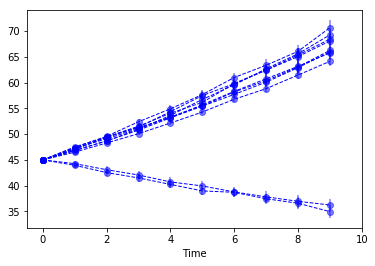

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 10)
ax.set_xlabel("Time")
color = ['b','r']
marker = ['o']
i = 1
for x in tumor_keys:
    mean = Tumor_vol_pivot_table.loc[:,x]
    sem = Tumor_vol_pivot_sem.loc[:,x]
    
    ax.errorbar(np.arange(0, len(mean)), mean, yerr=sem, fmt="o", color="b",
                alpha=0.5, label=False)
    ax.plot(np.arange(0, len(mean)), mean, "b--", linewidth=1)
    i = i + 1j

    #ax.set_xlim(-0.5, len(mean))

    #ax.set_ylabel("Tumor Volume (mm3)")
    #plt.legend(loc="best", fontsize="small", fancybox=True)

plt.show()



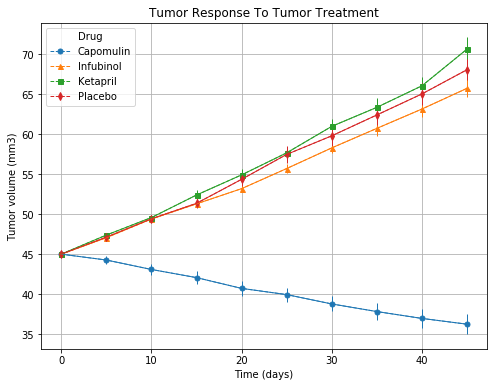

In [16]:
#plot error bars
errors = Tumor_vol_pivot_sem
ax = Tumor_vol_pivot_table[['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(12,8),linewidth=1,
                                                                              yerr = errors, legend = False)

#reset color cycle so that the marker colors match
ax.set_prop_cycle(None)
#plot the markers
Tumor_vol_pivot_table[['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(8,6), 
                                                                           style=['o--', '^--', 's--', 'd--'], 
                                                                           markersize=5, linewidth=1,
                                                                           ax = ax)
plt.title("Tumor Response To Tumor Treatment")
plt.xlabel('Time (days)')
plt.ylabel('Tumor volume (mm3)')
plt.grid()
plt.show()



## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Tumor_MetSite_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint']).mean()
Tumor_MetSite_mean = Tumor_MetSite_mean.loc[:,'Metastatic Sites']

# Convert to DataFrame
# Preview DataFrame
Tumor_MetSite_mean_df = pd.DataFrame(Tumor_MetSite_mean)
Tumor_MetSite_mean_df.head(3)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16
          10                     0.32

In [29]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
Tumor_MetSite_pivot_table = pd.pivot_table(Tumor_MetSite_mean_df,index='Timepoint',columns='Drug', 
                                         values= 'Metastatic Sites')

Tumor_MetSite_pivot_table.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.16,0.380952,0.280000,0.304348,0.26087,0.375000,0.320000,0.12,0.240000,0.166667
10,0.32,0.600000,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.500000


In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
Tumor_MetSite_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint']).sem()
Tumor_MetSite_sem = Tumor_MetSite_sem.loc[:,'Metastatic Sites']
Tumor_MetSite_sem_df = pd.DataFrame(Tumor_MetSite_sem)
Tumor_MetSite_pivot_sem = pd.pivot_table(Tumor_MetSite_sem_df,index='Timepoint',columns='Drug', 
                                         values= 'Metastatic Sites')

Tumor_MetSite_pivot_sem.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109


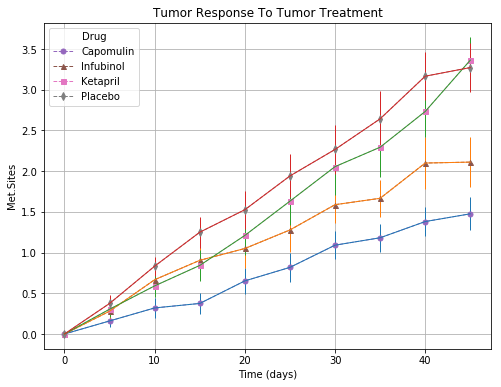

In [33]:
# Generate the Plot (with Error Bars)
#plot error bars
errors1 = Tumor_MetSite_pivot_sem
ax1 = Tumor_MetSite_pivot_table[['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(12,8),linewidth=1,yerr = errors1, legend = False)  

ax.set_prop_cycle(None)
Tumor_MetSite_pivot_table[['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(8,6), 
                                                                           style=['o--', '^--', 's--', 'd--'], 
                                                                           markersize=5, linewidth=1,
                                                                           ax = ax1) 

plt.title("Tumor Response To Tumor Treatment")
plt.xlabel('Time (days)')
plt.ylabel('Met.Sites')
plt.grid()
plt.show()


## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
Mice_count = mouse_clinical_df.groupby(['Drug', 'Timepoint']).count()
Mice_count = Mice_count.loc[:,'Mouse ID']
Mice_count = pd.DataFrame(Mice_count).rename(columns={"Mouse ID":"Mouse Count"})
Mice_count_df = Mice_count.reset_index()
Mice_count_df.head(3)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25


In [22]:
Mice_count_df['Survival Percentage']=Mice_count_df.loc[:,'Mouse Count'].div(Mice_count_df.iloc[0]['Mouse Count']).mul(100)
Mice_count_pct = pd.DataFrame(Mice_count_df)
Mice_count_pct1 = Mice_count_pct.drop(['Mouse Count'], axis=1)
Mice_count_pct1.head(3)


,Drug,Timepoint,Survival Percentage
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0


In [23]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
Mice_count_pivot = pd.pivot_table(Mice_count_df,index='Timepoint',columns='Drug', 
                                         values= 'Mouse Count')
Mice_count_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22


In [24]:
Mice_count_pivot_pct = pd.pivot_table(Mice_count_df,index='Timepoint',columns='Drug', 
                                         values= 'Survival Percentage')
Mice_count_pivot_pct.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0


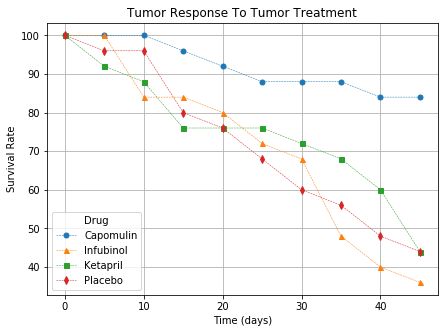

In [25]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
Mice_count_pivot_pct[['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(7,5), 
        style=['o--', '^--', 's--', 'd--'], markersize=5, linewidth=0.5)

plt.title("Tumor Response To Tumor Treatment")
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate')
plt.grid()
plt.show()

## Summary Bar Graph

In [26]:
# Calculate the percent changes for each drug
# Display the data to confirm
Tumor_vol_mean_df1['Percentage Tumor Vol']=Tumor_vol_mean_df1.loc[:,'Tumor Volume (mm3)'].div(Tumor_vol_mean_df1.iloc[0]['Tumor Volume (mm3)']).mul(100)
Tumor_vol_pct_df= Tumor_vol_mean_df1                                                                                           
Tumor_vol_pivotpct= pd.pivot_table(Tumor_vol_pct_df, index='Timepoint',columns='Drug', 
                                         values= 'Percentage Tumor Vol')
Tumor_vol_pivotpct.head(3)   


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
5,98.369081,103.340113,104.582225,105.309277,103.991329,104.723532,104.997705,97.655243,105.616559,104.115152
10,95.742868,107.300278,109.786463,110.182820,108.209355,109.829621,109.114535,94.515461,109.919653,108.199737


In [27]:
#Substract Final timepoint from initial time point.
drug_pct_chg = Tumor_vol_pivotpct.iloc[9]-Tumor_vol_pivotpct.iloc[0]
drug_pct_chg

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [72]:
drug_pct_chg_df= drug_pct_chg.to_frame('%Tumor Vol Chng')
drug_pct_chg_df.head()



,%Tumor Vol Chng
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


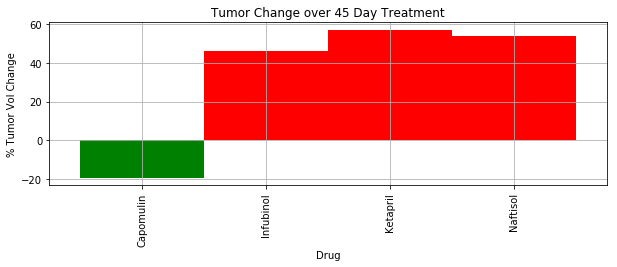

In [79]:
drug_pct_chg_df.iloc[[0,2,3,4],:].plot(kind="bar", y='%Tumor Vol Chng', figsize=(10,3),
                                       legend=False, color= ["green", "red", "red", "red"],width=1)
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel('% Tumor Vol Change')
plt.grid()
plt.show()

In [28]:
# Store all Relevant Percent Changes into a Tuple
Drug_PctChg_tuple=list(zip(drug_pct_chg.index,drug_pct_chg))
Drug_PctChg_tuple


[('Capomulin', -19.47530266789417),
 ('Ceftamin', 42.51649185589744),
 ('Infubinol', 46.123471727851864),
 ('Ketapril', 57.02879468660606),
 ('Naftisol', 53.923347134769216),
 ('Placebo', 51.29796048315151),
 ('Propriva', 47.24117486320637),
 ('Ramicane', -22.320900462766673),
 ('Stelasyn', 52.085134287899024),
 ('Zoniferol', 46.579750865095235)]

In [42]:
y = [{x[1],x[0]} for x in Drug_PctChg_tuple if x[1]<0]
y

[{-19.47530266789417, 'Capomulin'}, {-22.320900462766673, 'Ramicane'}]

In [43]:
z=[{x[1],x[0]} for x in Drug_PctChg_tuple if x[1]>0]
z

[{42.51649185589744, 'Ceftamin'},
 {46.123471727851864, 'Infubinol'},
 {57.02879468660606, 'Ketapril'},
 {53.923347134769216, 'Naftisol'},
 {51.29796048315151, 'Placebo'},
 {47.24117486320637, 'Propriva'},
 {52.085134287899024, 'Stelasyn'},
 {46.579750865095235, 'Zoniferol'}]

In [68]:
# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()